SQL Query
SELECT  gaia_source.source_id,gaia_source.ra,gaia_source.ra_error,gaia_source.dec,gaia_source.dec_error,gaia_source.parallax,gaia_source.parallax_error,gaia_source.phot_g_mean_mag,gaia_source.bp_rp,gaia_source.radial_velocity,gaia_source.radial_velocity_error,gaia_source.phot_variable_flag,gaia_source.teff_val,gaia_source.a_g_val,gaia_source.lum_val
FROM gaiadr2.gaia_source 
WHERE 
CONTAINS(
	POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),
	CIRCLE(
		'ICRS',
		COORD1(EPOCH_PROP_POS(132.846,11.814,1.1325,-10.9737,-2.9396,33.9200,2000,2015.5)),
		COORD2(EPOCH_PROP_POS(132.846,11.814,1.1325,-10.9737,-2.9396,33.9200,2000,2015.5)),
		0.6666666666666666)
)=1  AND  (gaiadr2.gaia_source.parallax>=0.5)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import units as u
from astropy import constants as c
import mplhep as hep
%matplotlib inline
hep.style.use("CMS")

query_result = pd.read_csv('gaia_data_2.csv')
query_result

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val,lum_val
0,598691984069077248,132.945370,0.601027,11.258305,0.436349,2.390477,0.764513,19.998251,2.462278,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
1,598690369158191872,132.912227,0.084070,11.225536,0.049075,0.718323,0.104095,16.660885,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
2,598691228155046016,133.025408,0.906173,11.228774,0.613882,3.774747,1.112118,20.489107,1.390373,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
3,598692190224359808,132.925903,1.373622,11.272759,0.985739,1.717389,1.701020,20.818865,1.263166,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
4,598695660556715136,132.942568,0.777448,11.318312,0.544164,1.111886,0.949824,20.280863,2.070683,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5541,607997120905720320,132.488938,0.033668,12.288984,0.022773,0.525231,0.041895,15.115790,0.832819,NaN,NaN,NOT_AVAILABLE,5785.75,0.8017,2.424457
5542,607997670661533696,132.530265,0.190403,12.327733,0.150326,1.174508,0.233415,18.293692,1.934572,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
5543,607995673501015808,132.387229,0.118963,12.265745,0.068797,0.800163,0.137758,17.532904,1.143101,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
5544,607996395055520896,132.356474,0.180255,12.263674,0.102414,0.588576,0.209761,18.265010,1.435125,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN


5546 stars reported 

In [3]:
#remove all nan values from bp_rp
query_result_filtered = query_result.dropna(subset=['bp_rp'])
query_result_filtered

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val,lum_val
0,598691984069077248,132.945370,0.601027,11.258305,0.436349,2.390477,0.764513,19.998251,2.462278,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
2,598691228155046016,133.025408,0.906173,11.228774,0.613882,3.774747,1.112118,20.489107,1.390373,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
3,598692190224359808,132.925903,1.373622,11.272759,0.985739,1.717389,1.701020,20.818865,1.263166,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
4,598695660556715136,132.942568,0.777448,11.318312,0.544164,1.111886,0.949824,20.280863,2.070683,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
5,598694153022786432,132.793285,1.061320,11.265985,0.681628,2.247905,1.308180,20.571629,1.000721,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5541,607997120905720320,132.488938,0.033668,12.288984,0.022773,0.525231,0.041895,15.115790,0.832819,NaN,NaN,NOT_AVAILABLE,5785.75,0.8017,2.424457
5542,607997670661533696,132.530265,0.190403,12.327733,0.150326,1.174508,0.233415,18.293692,1.934572,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
5543,607995673501015808,132.387229,0.118963,12.265745,0.068797,0.800163,0.137758,17.532904,1.143101,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
5544,607996395055520896,132.356474,0.180255,12.263674,0.102414,0.588576,0.209761,18.265010,1.435125,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN


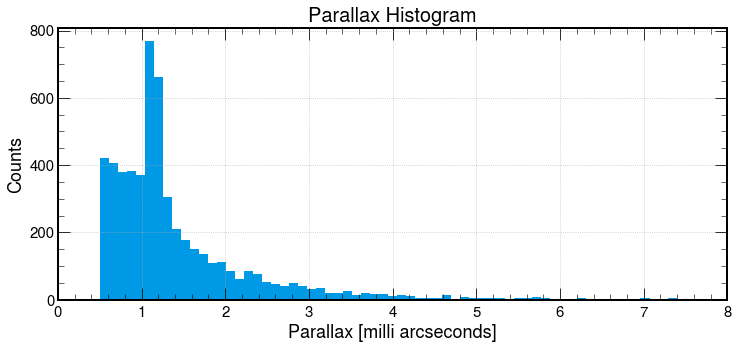

In [18]:

parallax = query_result_filtered['parallax']

plt.figure(figsize=(12,5))
plt.hist(parallax, bins=200, color='#0099e6')
plt.xlim(0,8)
plt.xlabel("Parallax [milli arcseconds]", fontsize=18, loc="center")
plt.ylabel("Counts", fontsize=18, loc="center")
plt.title("Parallax Histogram", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()



Parallax range: p1 = 1 milli arcsecond     ; p2 = 1.3 milli arcsecond
                   = 0.001 arseconds       ;    = 0.0013
                d1 = 1/p1 = 1000 parsecs   ; d2 = 1/p2 = 769.23 parsecs
The distance ranges from 1000 parsecs to 769.23 parsecs

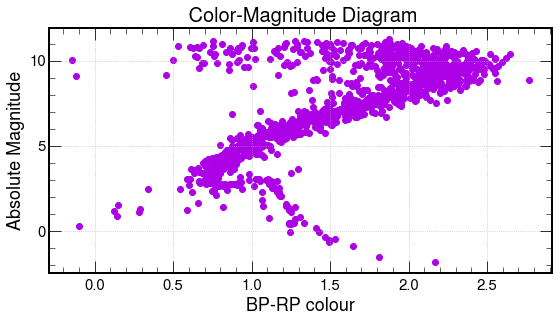

In [38]:
#call bp_rp, mag
bp_rp = query_result_filtered['bp_rp']

mag = query_result_filtered['phot_g_mean_mag']


# parallax_fil=[]
# for i in parallax:
#     if i >= 1 and i <= 1.3:
#          parallax_fil.append(i)

#filter out bp_rp values that correspond to removed parallax values
# bp_rp_fil = []
# for i in parallax_fil:
#     row_data = query_result_filtered.loc[bp_rp]
#     value = query_result_filtered.loc[i, 'bp_rp']
#     bp_rp_fil.append(value)

parallax_fil = []
bp_rp_fil = []
app_mag = []

for index, row in query_result_filtered.iterrows():
    if row['parallax'] >= 1 and row['parallax'] <= 1.3:
        parallax_fil.append(row['parallax'])
        bp_rp_fil.append(row['bp_rp'])
        app_mag.append(row['phot_g_mean_mag'])

# print("Filtered parallax values:", parallax_fil)
# print("Filtered bp_rp values:", bp_rp_fil)
# print("Filtered phot_g_mean_mag values:", app_mag)
    
#calculate absolute magnitude
d1 = 1000
d2 = 769.23
d = (1000+769.23)/2
abs_mag = app_mag - 5*np.log10(d/10)

plt.figure(figsize=(9,4.5))
plt.scatter(bp_rp_fil, abs_mag, color='#ac00e6')
plt.ylabel('Absolute Magnitude', fontsize=18, loc="center")
plt.xlabel('BP-RP colour', fontsize=18, loc="center")
plt.title(" Color-Magnitude Diagram", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()


Other constraints such as flux or luminosity can help reduce the interlopers without removing stars in the cluster. Temperature is also proportional to the luminosity of a star, thus it can be used as a constriant as well.